In [5]:
from pylab import *
import numpy as np

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 


## for \(M_*(t)\)

$\(\dot{M}_{in} = \frac{m_0 c_s^3}{G}\)

\(\frac{dM}{dt} = \frac{m_0 c_s^3}{G}\)

\(dM = \frac{m_0 c_s^3}{G} dt\) taking the integral of this results in

\(M_*(t) = \frac{m_0 c_s^3 t}{G}\)

## For \(R_c(t)\)

\(R_c = \frac{j^2}{GM_*}\) and inserting \(j_i = r_i^2 \Omega_i\), \(M_*(t)\), \(r_i = (m_0/2) c_s t\)

\(\large R_c = \frac{((m_0/2 \cdot c_s \cdot t)^2 \Omega)^2}{G \frac{m_0 c_s^3 t}{G}}\)

\(\large R_c = \frac{(m_0 c_s t)^4 \Omega^2}{16 G \frac{m_0 c_s^3 t}{G}}\)

\(R_c(t) = \frac{\Omega^2}{16} m_0^3 c_s t^3\)


### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

$E_U = - \frac{3}{5}\frac{GMm}{R}$ for Gravitational Energy

$E_{\text{ROT}} = \frac{1}{2} I \Omega^2$, where $I = \frac{2}{5}mR^2$ for Rotational Energy

We set them both equal to each other and solve for $\Omega$:

$\frac{3}{5}\frac{GMm}{R} = \frac{1}{2} \frac{2}{5}mR^2 \Omega^2$

$\Omega = \sqrt{\frac{3GM}{R^3}}$


In [6]:
m_0 = 0.975
pc = 3.086e18
R = 0.1 * pc
M = 1.989e13
G = 6.67e-8

Omega = np.sqrt(3*G*M/R**3)

print(Omega)

1.1637161280516185e-23


### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

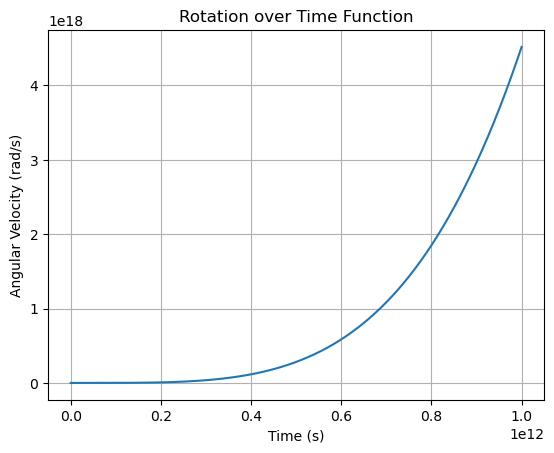

In [7]:
#Part C answer:
c_s = 0.2 #km/s
m_0 = 0.975
t = np.linspace(0, 500)
kyrtos = 3.15e9
Omega = 2e-14 #rad/s
t = np.logspace(-1,12,1000000) #log spacing of 0 to 1e12 seconds - 0 to 500 kyr

def cent_rad(Omega):
    r_i = (((m_0*t)**4)*(c_s)*(Omega**2))/16
    return r_i

#plt.style.use('seaborn-v0_8-pastel')
plt.plot(t, cent_rad(Omega))
plt.title('Rotation over Time Function')
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)")
plt.grid()

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 

/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/3316042035.py:12: RuntimeWarning: divide by zero encountered in power
  Omega_i_t = lambda t: k * ((m_0/2 * c_s * t)**-1.33)
/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/3316042035.py:19: RuntimeWarning: invalid value encountered in multiply
  j_i_squared = (r_i**2 * Omega_i_t(t))**2


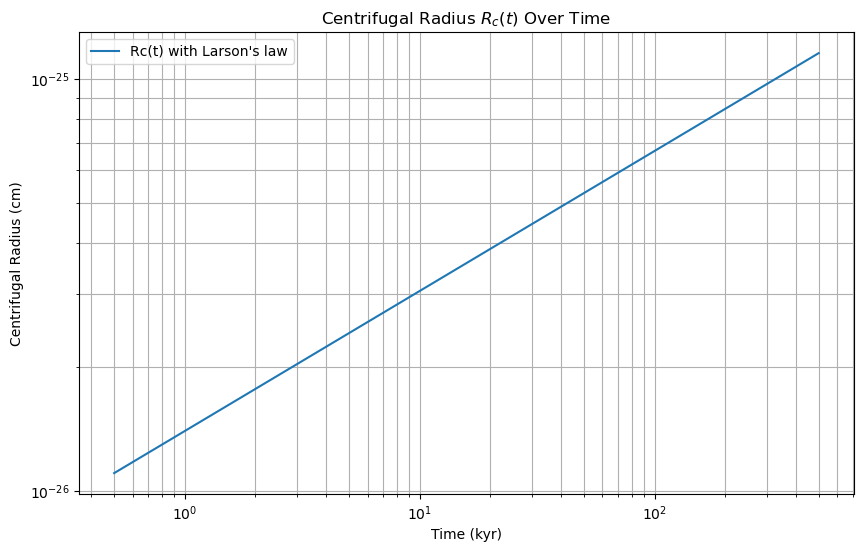

In [15]:
k = 1e-15  # Arbitrary choice for k in Larson's law, adjust based on your scenario

# Convert sound speed to cm/s for consistency in units
c_s *= 0.2  # from km/s to cm/s

# Define t in seconds, converting from kyr to seconds
t = np.linspace(0, 500*1000*365.25*24*3600, 1000)  # 0 to 500 kyr in seconds

# Define Larson's law adjusted for radius as a function of time
# r_i = (m_0/2) * c_s * t
# Omega_i(t) = k * (r_i)^-1.33, but we'll express everything in terms of t for direct computation
Omega_i_t = lambda t: k * ((m_0/2 * c_s * t)**-1.33)

# Define Rc(t) using the specified relation
def Rc(t):
    # Calculate angular momentum squared, j^2 = r^4 * Omega^2
    # Here, r = ri = (m_0/2) * c_s * t, and Omega = Omega_i(t)
    r_i = (m_0/2) * c_s * t
    j_i_squared = (r_i**2 * Omega_i_t(t))**2
    # Substitute j^2 into Rc = j^2 / (G * M_star(t))
    # M_star(t) = m_0 * c_s^3 * t / G from Part a
    M_star_t = m_0 * c_s**3 * t / G
    Rc = j_i_squared / (G * M_star_t)
    return Rc

# Now, we plot Rc(t)
plt.figure(figsize=(10, 6))
plt.loglog(t/(365.25*24*3600*1000), Rc(t), label='Rc(t) with Larson\'s law')  # Convert t back to kyr for the plot
plt.xlabel('Time (kyr)')
plt.ylabel('Centrifugal Radius (cm)')
plt.title('Centrifugal Radius $R_c(t)$ Over Time')
plt.grid(True, which="both")
plt.legend()
plt.show()


### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/3316042035.py:12: RuntimeWarning: divide by zero encountered in power
  Omega_i_t = lambda t: k * ((m_0/2 * c_s * t)**-1.33)
/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/3316042035.py:19: RuntimeWarning: invalid value encountered in multiply
  j_i_squared = (r_i**2 * Omega_i_t(t))**2
/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/751111164.py:5: RuntimeWarning: divide by zero encountered in power
  Omega_i_r = lambda r: Omega_s * (r / r_s)**p
/var/folders/g_/9bnt84_x55q5xhjhdn2t3k5r0000gn/T/ipykernel_64709/751111164.py:9: RuntimeWarning: invalid value encountered in multiply
  j_i_squared = (r_i**2 * Omega_i_r(r_i))**2


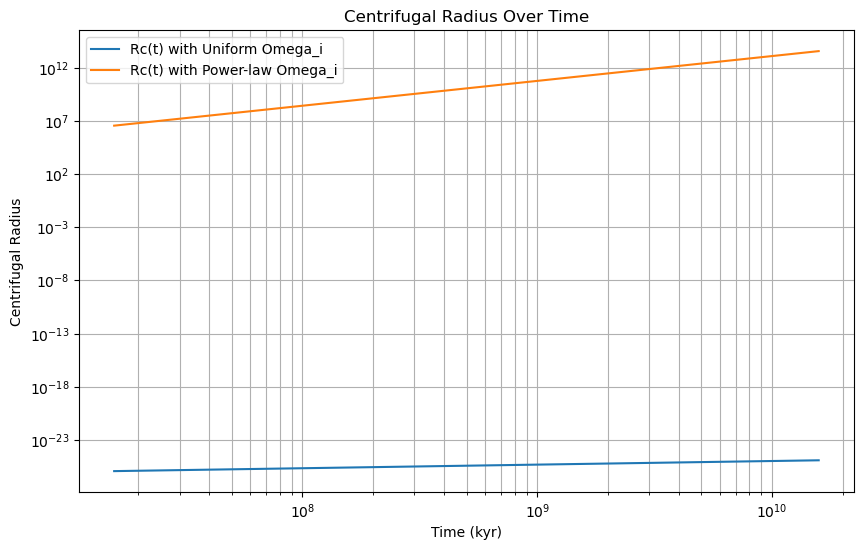

In [21]:
Omega_s = 2e-14  # rad/s
r_s = 0.05 * 3.086e18  # pc to cm
p = -0.33  # Power-law exponent

Omega_i_r = lambda r: Omega_s * (r / r_s)**p

def Rc_power_law(t):
    r_i = (m_0/2) * c_s * t
    j_i_squared = (r_i**2 * Omega_i_r(r_i))**2
   
    M_star_t = m_0 * c_s**3 * t / G
    Rc = j_i_squared / (G * M_star_t)
    return Rc

plt.figure(figsize=(10, 6))
plt.loglog(t/(1000), Rc(t), label='Rc(t) with Uniform Omega_i') 
plt.loglog(t/(1000), Rc_power_law(t), label='Rc(t) with Power-law Omega_i')  
plt.xlabel('Time (kyr)')
plt.ylabel('Centrifugal Radius')
plt.title('Centrifugal Radius Over Time')
plt.grid(True, which="both")
plt.legend()
plt.show()


## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced